To get all the data from all surverys covering 5c7.269 using vizier

In [17]:
from astroquery.vizier import Vizier
Vizier.ROW_LIMIT = -1

OrderedDict()


In [50]:
import pandas as pd
import numpy as np

In [69]:
df = pd.DataFrame(columns=['ID','description'])

In [70]:
from astroquery.vizier import Vizier
result = Vizier.query_object("NVSS J082838+252827")
for table in result:
    item = table.meta
    # print(item)
    df = df.append(item, ignore_index=True)

print(df)

                              ID  \
0                      I_252_out   
1                      I_254_out   
2                      I_255_out   
3                      I_267_out   
4                      I_271_out   
..                           ...   
141    J_MNRAS_463_4210_ucac4rpm   
142    J_MNRAS_474_5008_spidxcat   
143     J_MNRAS_495_3087_catalog   
144       J_MNRAS_507_318_table2   
145  J_other_AstBu_64_123_table1   

                                           description  \
0                                   The Full Catalogue   
1                 output (out of 25,258,765 positions)   
2                 output (out of 25,258,765 positions)   
3                      The Full Northern APM Catalogue   
4      The Full GSC2.2.1 Catalogue (455851237 objects)   
..                                                 ...   
141                             UCAC4-RPM catalog v1.0   
142                          *Spectral index catalogue   
143  Photometrically derived Teff, logg, {DEL

/tmp/ipykernel_34898/2979353161.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(item, ignore_index=True)
/tmp/ipykernel_34898/2979353161.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(item, ignore_index=True)
/tmp/ipykernel_34898/2979353161.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(item, ignore_index=True)
/tmp/ipykernel_34898/2979353161.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(item, ignore_index=True)
/tmp/ipykernel_34898/2979353161.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

In [82]:
pd.set_option('display.max_rows', None)
df['name']

0                        I/252/out
1                        I/254/out
2                        I/255/out
3                        I/267/out
4                        I/271/out
5                        I/284/out
6                        I/289/out
7                        I/297/out
8                        I/304/out
9                        I/305/out
10                    I/312/sample
11                    I/317/sample
12                       I/319/xpm
13                      I/322A/out
14                     I/324/igsl3
15                     I/327/cmc15
16                     I/329/urat1
17                      I/331/apop
18                      I/337/gaia
19                      I/339/hsoy
20                     I/340/ucac5
21                        I/342/f3
22                     I/345/gaia2
23                  I/347/gaia2dis
24                 I/349/starhorse
25                  I/350/gaiaedr3
26                  I/350/comscanl
27                    I/351/gps1_p
28                  

Query using coordinate instaed of Object?

In [85]:
# get the coordinate and details of 5C7.269
from astroquery.vizier import Vizier
Vizier.ROW_LIMIT = -1
data_5C7 = Simbad.query_object("5C7.269")


In [87]:
# query surrounding 420 arcsec from the coordinate of 5C7.269

import astropy.units as u
surrounding_5C7 = Simbad.query_region("5C7.269", radius=420 * u.arcsec)

print(surrounding_5C7)

          MAIN_ID                 RA      ... SCRIPT_NUMBER_ID
                               "h:m:s"    ...                 
--------------------------- ------------- ... ----------------
        NVSS J082838+252827  08 28 38.681 ...                1
Gaia DR2 679639477507524736 08 28 32.3058 ...                1
   SDSS J082829.53+252621.7 08 28 29.5404 ...                1
   SDSS J082848.16+253129.8 08 28 48.1704 ...                1
   SDSS J082827.67+253128.6  08 28 27.676 ...                1
    2MASX J08284048+2523400  08 28 40.532 ...                1
             TYC 1944-943-1 08 28 18.1981 ...                1
   SDSS J082858.82+252623.0  08 28 58.820 ...                1
   SDSS J082857.98+253151.2  08 28 57.989 ...                1
   SDSS J082855.32+252423.5  08 28 55.324 ...                1
   SDSS J082848.34+253355.5  08 28 48.345 ...                1
            TYC 1944-1101-1 08 28 22.4297 ...                1
   SDSS J082840.78+253509.5  08 28 40.781 ...          

In [88]:
surrounding_5C7.colnames

['MAIN_ID',
 'RA',
 'DEC',
 'RA_PREC',
 'DEC_PREC',
 'COO_ERR_MAJA',
 'COO_ERR_MINA',
 'COO_ERR_ANGLE',
 'COO_QUAL',
 'COO_WAVELENGTH',
 'COO_BIBCODE',
 'SCRIPT_NUMBER_ID']

AttributeError: module 'matplotlib.pyplot' has no attribute 'circle'

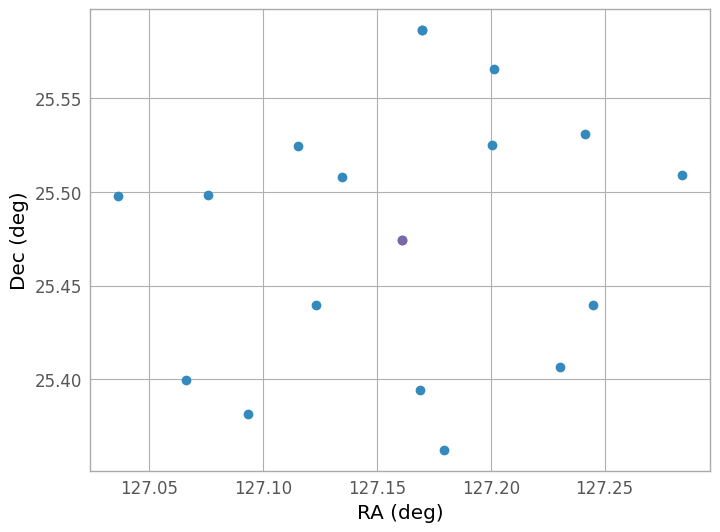

In [139]:
# plot the surrounding 5C7.269
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

c = SkyCoord(ra=surrounding_5C7['RA'], dec=surrounding_5C7['DEC'], unit=(u.hourangle, u.deg))
plt.scatter(c.ra.deg, c.dec.deg)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
# plt.show()

coor_5C7 = SkyCoord(ra=data_5C7['RA'], dec=data_5C7['DEC'], unit=(u.hourangle, u.deg))
plt.scatter(coor_5C7.ra.deg, coor_5C7.dec.deg)
plt.Circle((coor_5C7.ra.deg, coor_5C7.dec.deg), radius=Angle(420, u.arcsec).deg, color='r', fill=False)

In [142]:
plt.Circle((coor_5C7.ra.deg, coor_5C7.dec.deg), radius=Angle(420, u.arcsec).deg, color='r', fill=False)
plt.show()